# import all neccesary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# load  the data 

In [14]:
sales_data=pd.read_csv("advertising.csv")


In [17]:
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [18]:
sales_data.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# check data type

In [8]:
sales_data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# chesk null value

In [9]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# chesk duplicates data 

In [5]:
sales_data=sales_data.duplicated().any()

In [6]:
print(sales_data)


False


# Check Data type of data

In [9]:
print(type(sales_data))

<class 'numpy.bool_'>


# apply Stastics using Describe

In [21]:
print(sales_data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


# value count of sales

In [24]:


sales_data['Sales'].value_counts()

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

# show the relationship between "TV" advertising and "Sales"

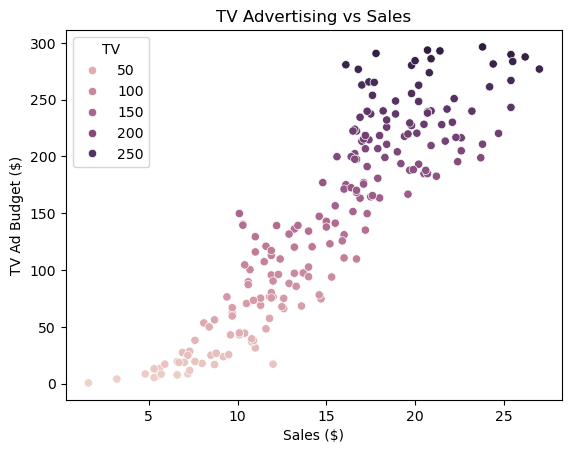

In [56]:
 # custom_colors = ["#ff9999", "#66b3ff",  "#99ff99", "#ffcc99"], palette="deep"
sns.scatterplot(x='Sales',y='TV', data=sales_data ,hue='TV' )
plt.title('TV Advertising vs Sales')
plt.ylabel('TV Ad Budget ($)')
plt.xlabel('Sales ($)')
plt.show()



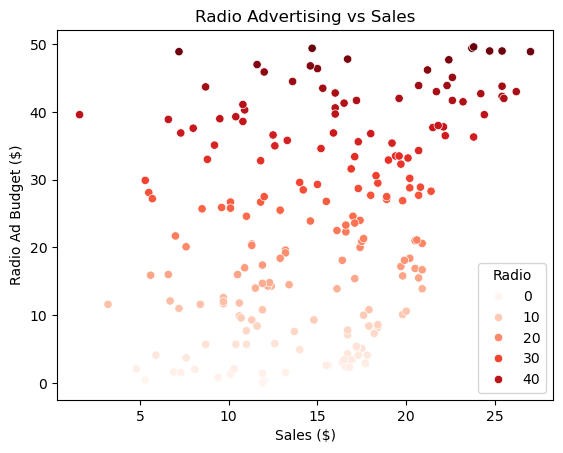

In [54]:
sns.scatterplot(x='Sales',y='Radio', data=sales_data ,hue='Radio', palette="ed" )
plt.title('Radio Advertising vs Sales')
plt.ylabel('Radio Ad Budget ($)')
plt.xlabel('Sales ($)')
plt.show()

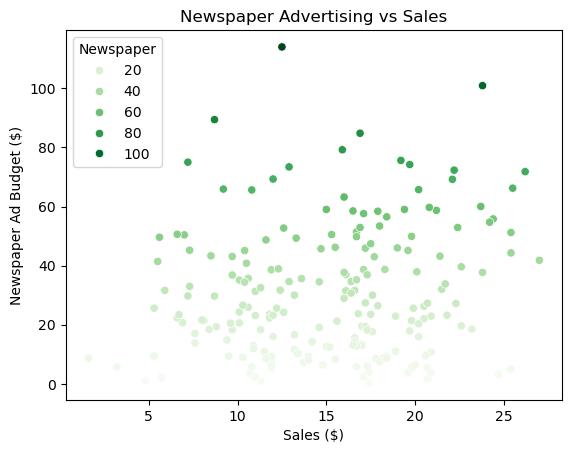

In [50]:


sns.scatterplot(x='Sales',y='Newspaper', data=sales_data ,hue='Newspaper', palette='Greens' )
plt.title('Newspaper Advertising vs Sales')
plt.ylabel('Newspaper Ad Budget ($)')
plt.xlabel('Sales ($)')
plt.show()

# pairplot of TV,Radio,Newspaper

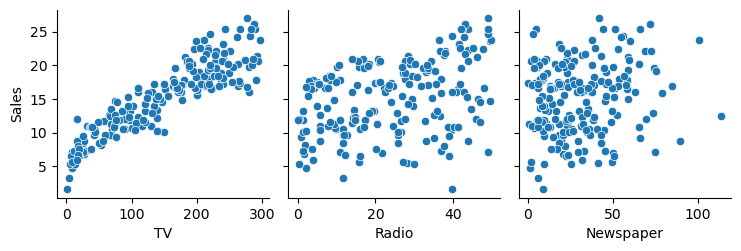

In [57]:

sns.pairplot(sales_data, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="scatter") 
plt.show()

 #when advertising cost increases in Tv Ads the sales will increases as well . while the for newspaper and radio it is bit unprectable

# Histogram Observation

<Axes: ylabel='Frequency'>

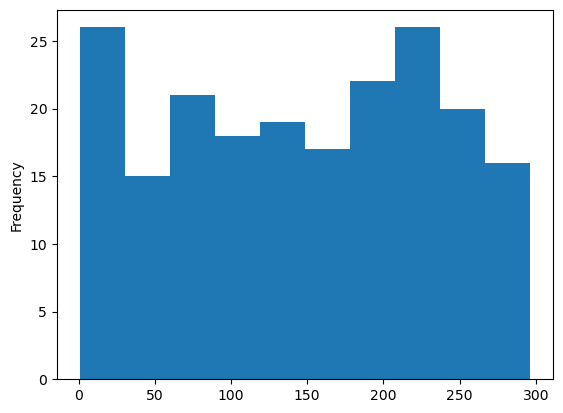

In [59]:
sales_data['TV'].plot.hist(bins=10)

<Axes: xlabel='Radio', ylabel='Frequency'>

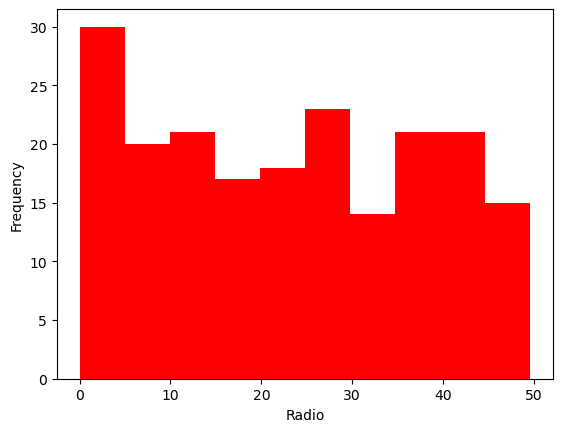

In [60]:
sales_data['Radio'].plot.hist(bins=10, color="red",xlabel="Radio")

<Axes: xlabel='Newspaper', ylabel='Frequency'>

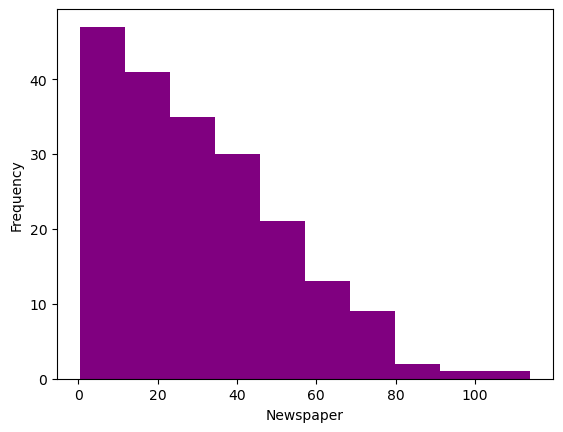

In [63]:
sales_data['Newspaper'].plot.hist(bins=10,color="purple", xlabel="Newspaper")

#👆the majority sales is the result of low advertising cost in Newspaper

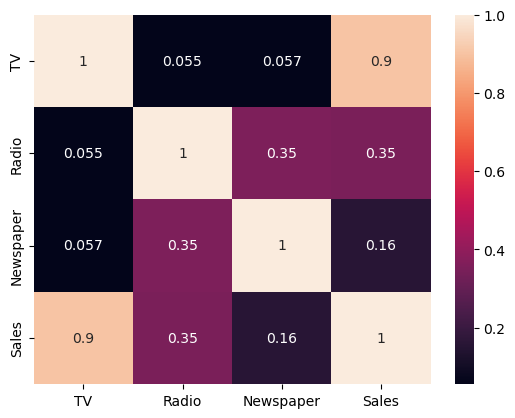

In [64]:
sns.heatmap(sales_data.corr(),annot=True)
plt.show()

#👆Sales is Highly Correleted with the tv

# let`s train our model using linear Regtrassion as it is cooreleted with only one variable TV

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(sales_data[['TV']],sales_data[['Sales']],test_size=0.3,random_state=0)

In [67]:
print(x_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [69]:
print(y_train)

     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [70]:
print(x_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [71]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    20.5
149   10.1
24     9.7
30    21.4
160   16.4
40    16.6
56     5.5


In [72]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [75]:
res=model.predict(x_test)


In [76]:
print(res)

[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]
 [21.44529217]
 [11.91645209]
 [15.71485245]
 [17.42249065]
 [11.32534656]
 [13.72260788]
 [21.68063975]
 [ 7.18213465]
 [11.23230217]
 [18.82362968]
 [22.88474361]
 [14.82272095]
 [16.72739433]
 [14.35202581]
 [10.07198391]
 [13.88133066]
 [16.20744039]
 [18.36388094]
 [19.40378881]
 [ 8.51759529]
 [10.85465142]
 [18.03001578]
 [22.50709285]
 [20.3725451 ]
 [ 7.86628457]
 [ 8.16731053]
 [10.40584907]
 [17.03936669]
 [10.88749061]
 [ 8.51212209]
 [ 9.16343282]
 [ 8.86788005]
 [14.96502414]
 [18.61564811]
 [18.93309367]
 [12.76479799]
 [ 7.6145174 ]
 [ 8.06879294]
 [14.02363385]
 [12.86878878]
 [13.15339515]
 [19.70481478]
 [21.03480222]
 [17.26376787]
 [ 9.59034237]
 [10.55362545]
 [23.17482317]
 [16.58509115]
 [18.22705095]
 [ 7.54336581]]


# coefficient value

In [78]:
model.coef_

array([[0.05473199]])

In [79]:
model.intercept_

array([7.14382225])

In [80]:
0.05473199* 69.2 + 7.14382225

10.931275958

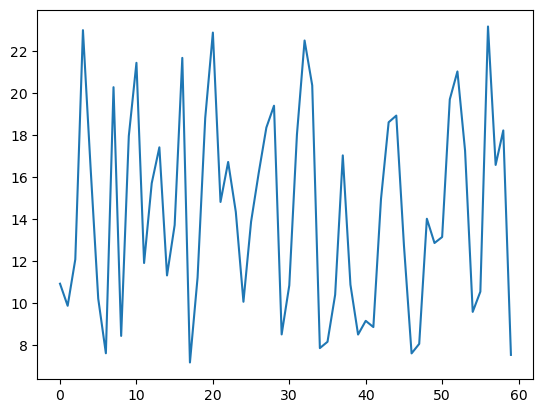

In [81]:
plt.plot(res)

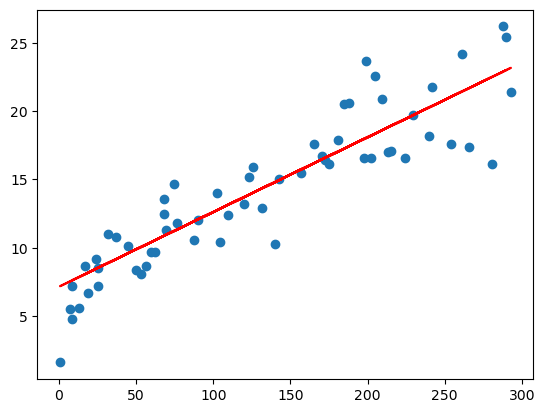

In [83]:
plt.scatter(x_test,y_test)
plt.plot(x_test,7.14382225 + 0.05473199 * x_test,'r')
plt.show()


#concluding with saying that above mention solution is successfully able to predict the sales using advertising platform datasets.